In [2]:
import itertools

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

In [3]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
                "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv("housing.csv", delim_whitespace=True, header=None, names=column_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df= df.drop(columns=[
    "CHAS", "RAD"
])

In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')

In [9]:
print(df.shape)
df.head()

(506, 12)


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


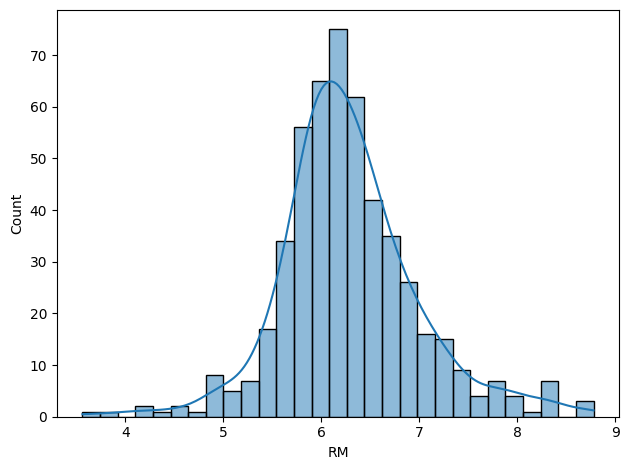

In [10]:
# Define the columns for distribution plots
columns_for_distribution = df.columns

# sns.histplot(df['MEDV'], kde=True)
sns.histplot(df['RM'], kde=True)

plt.tight_layout()
plt.show()

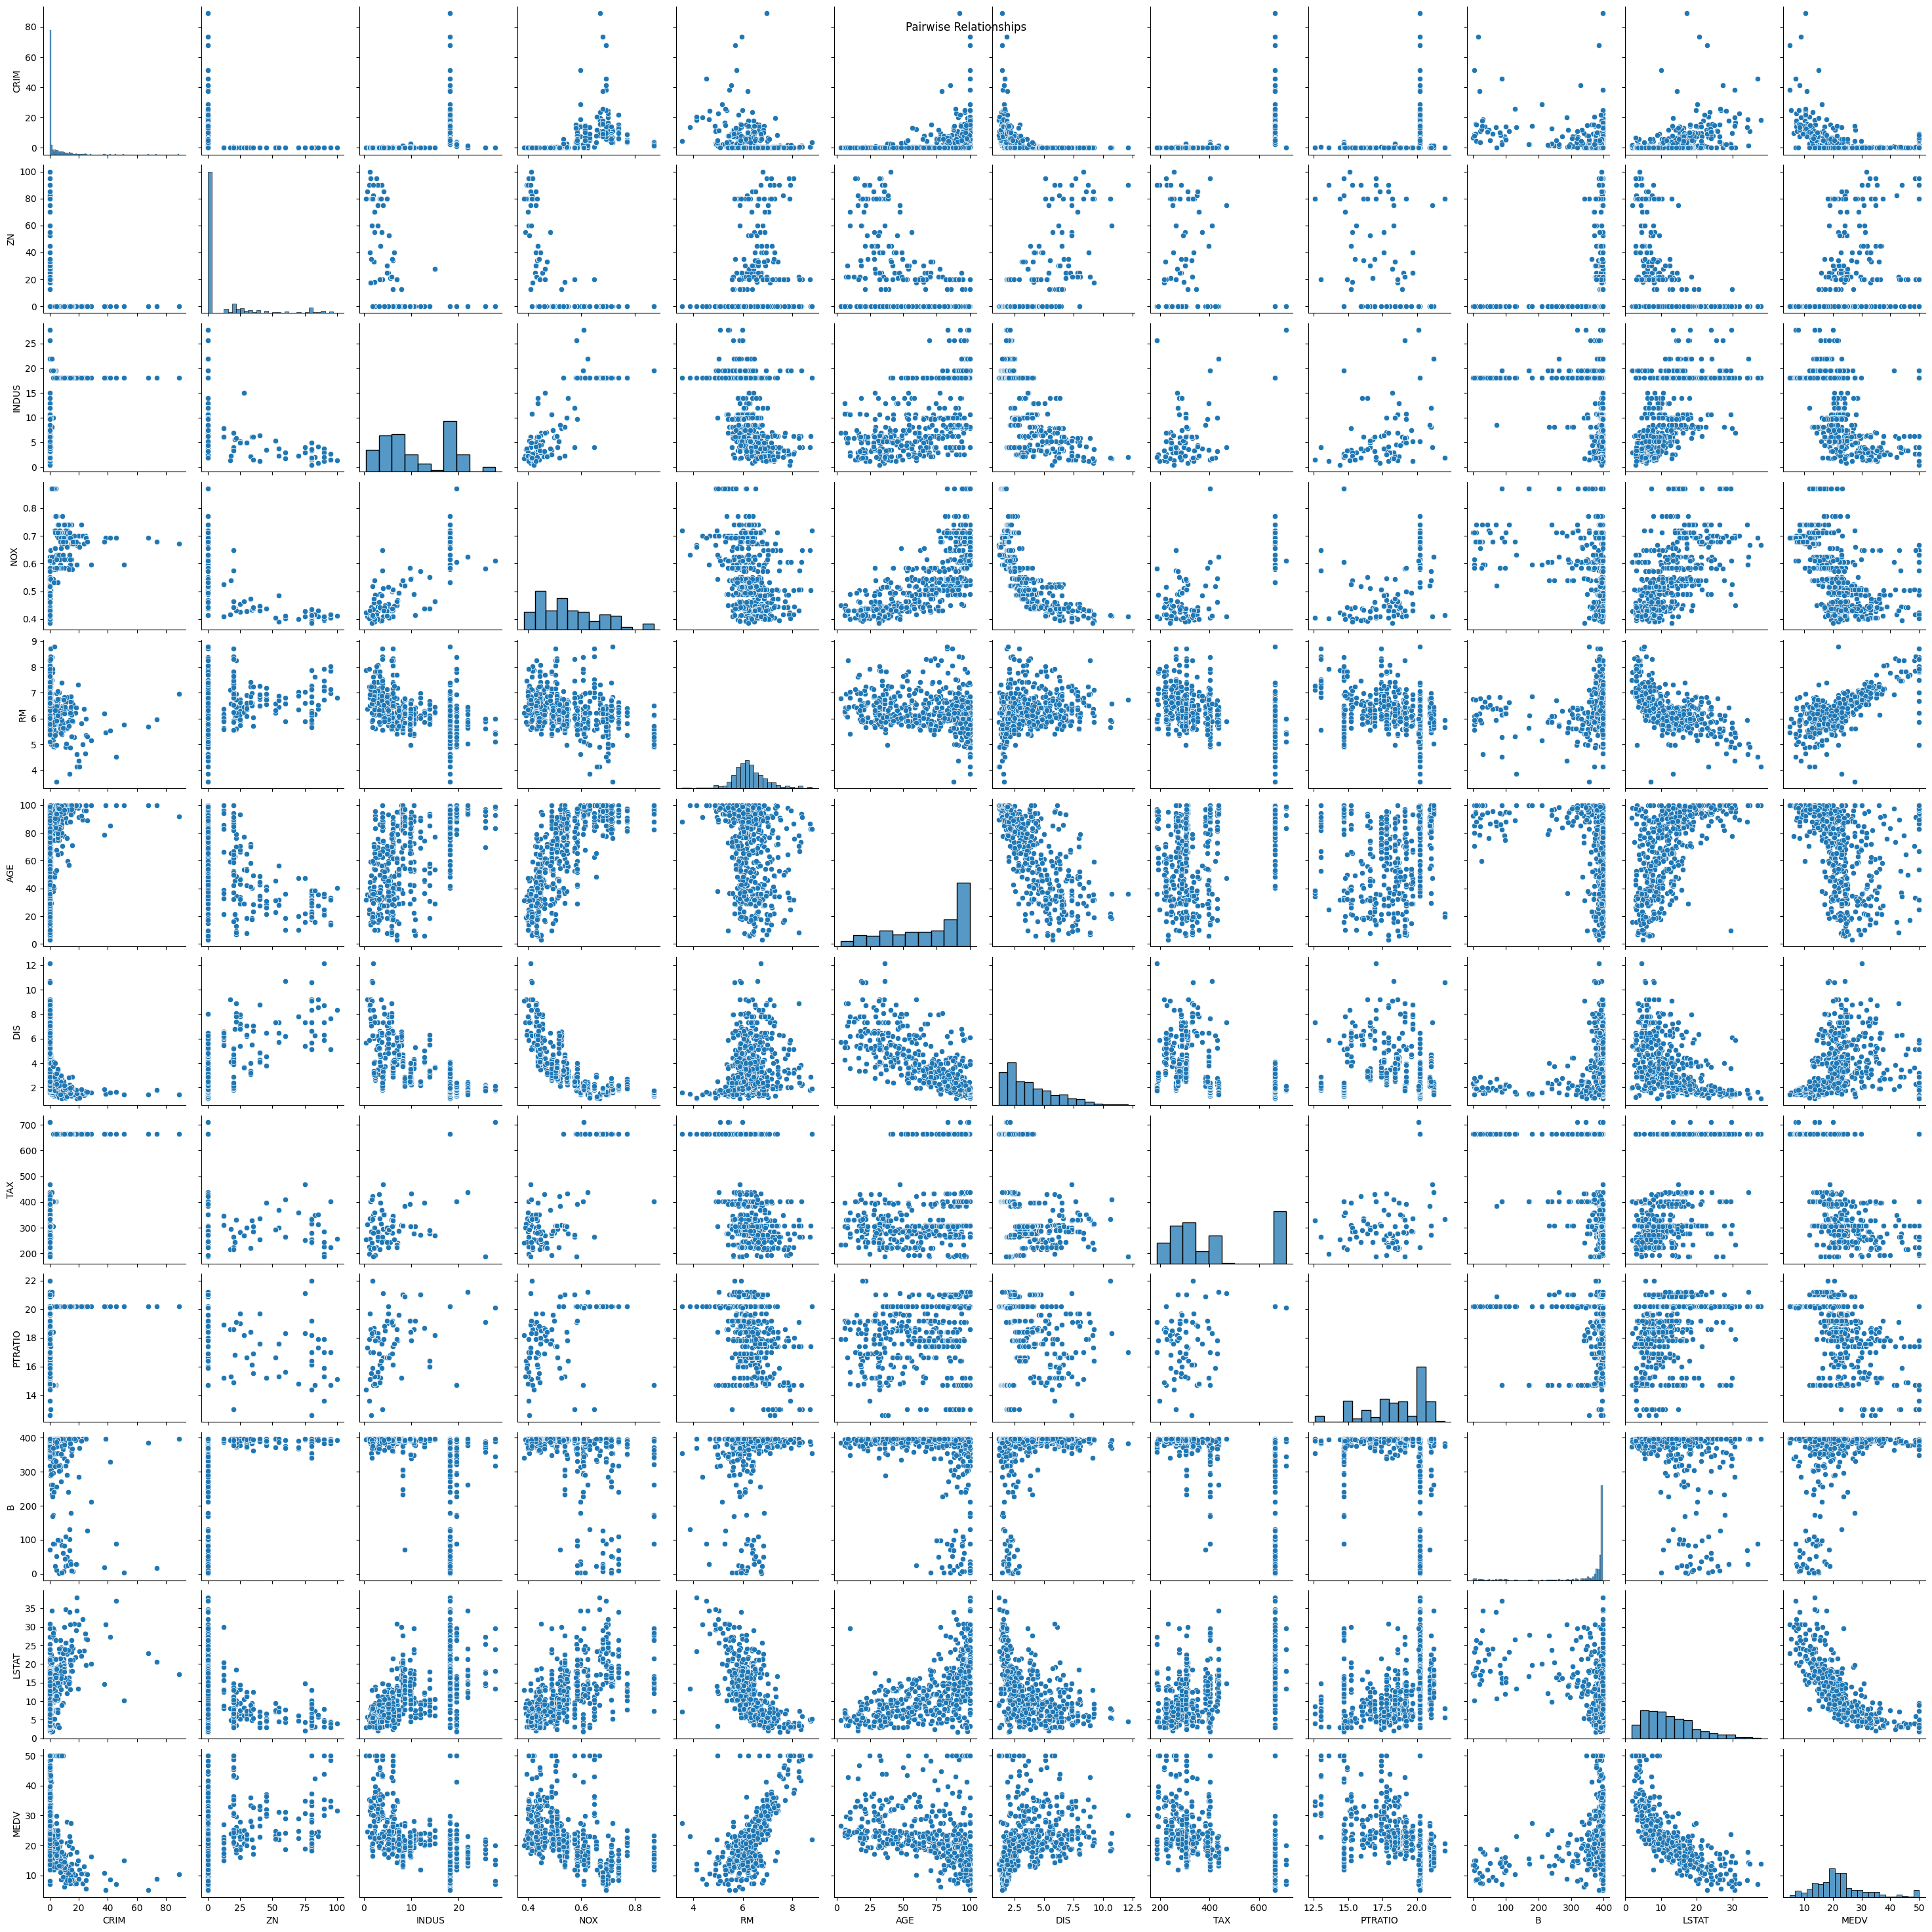

In [11]:
# Creating the pairplot
sns.pairplot(df)
plt.suptitle('Pairwise Relationships')
plt.show()

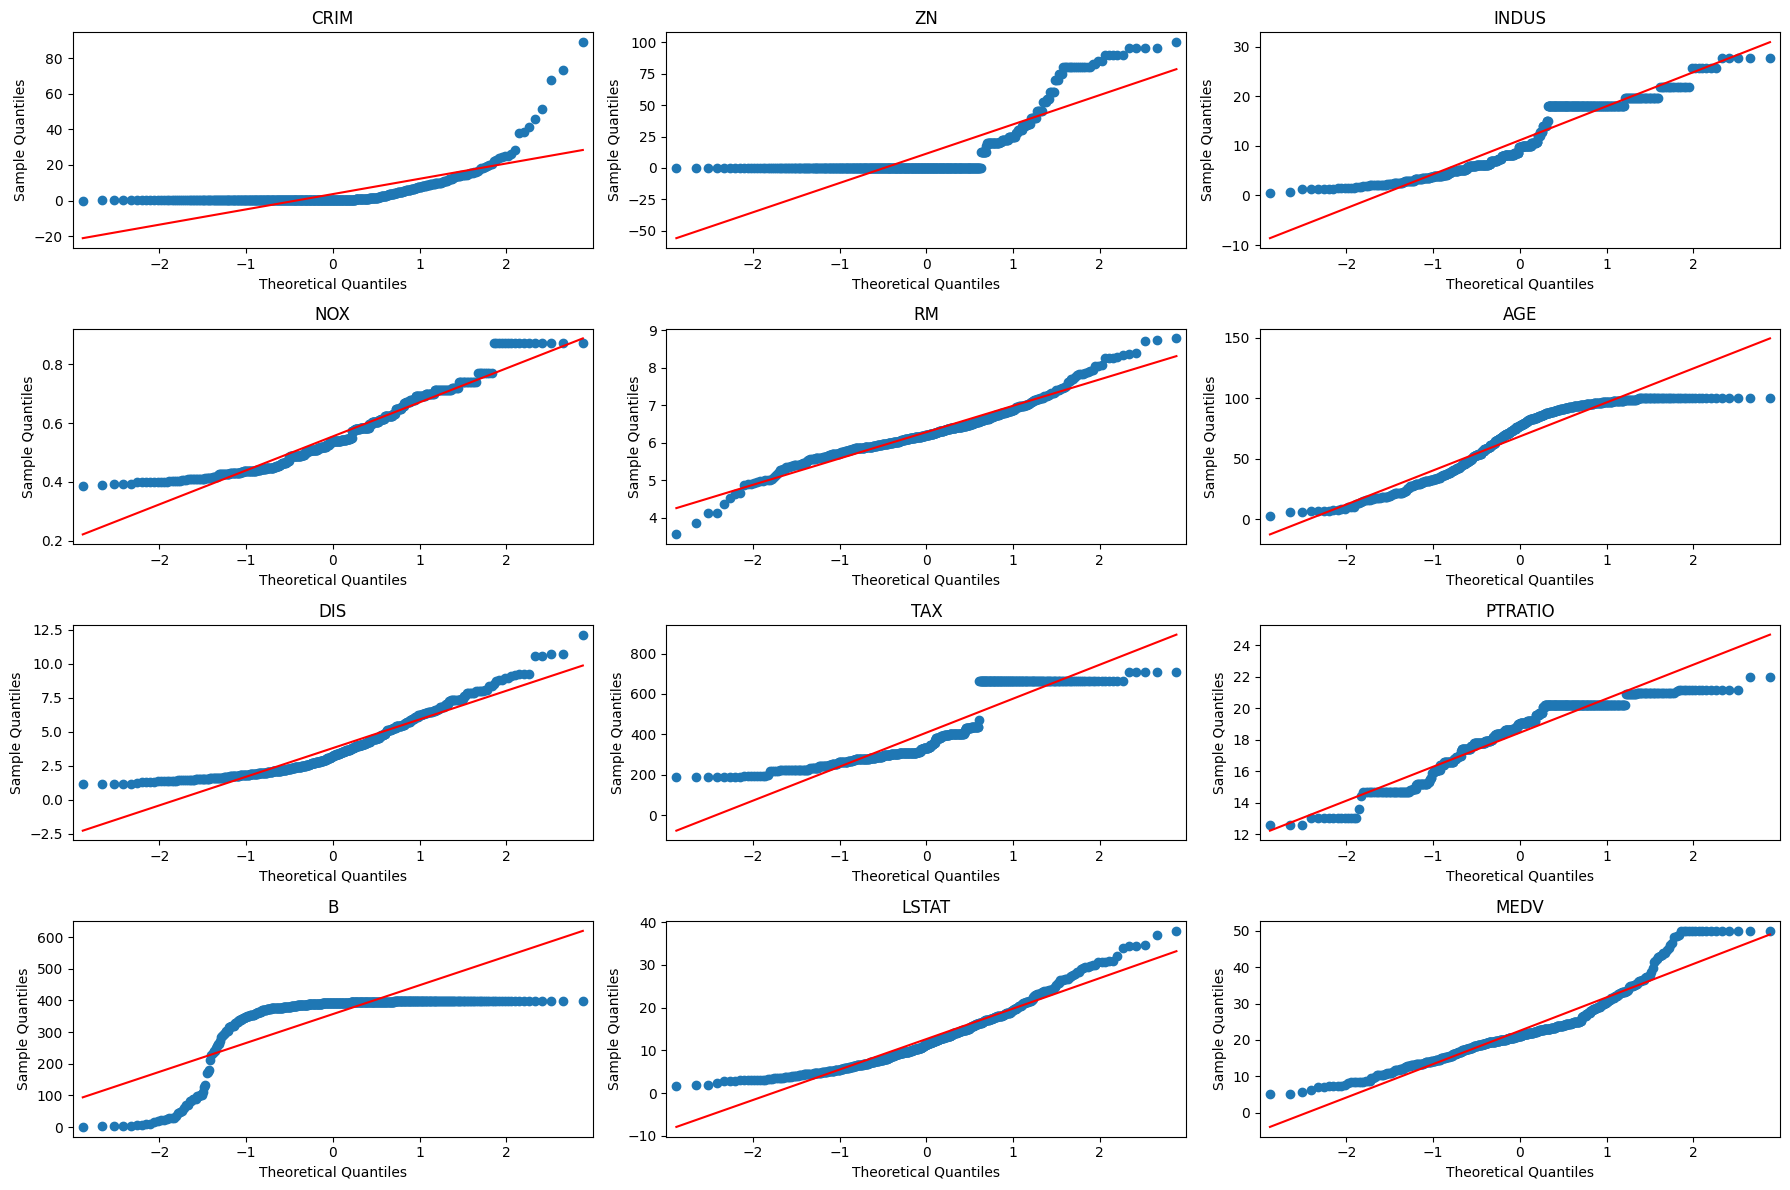

In [12]:
# Generate Q-Q plots
plt.figure(figsize=(18, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    qqplot(df[col].dropna(), line='s', ax=plt.gca())
    plt.title(col)

plt.tight_layout()
plt.show()

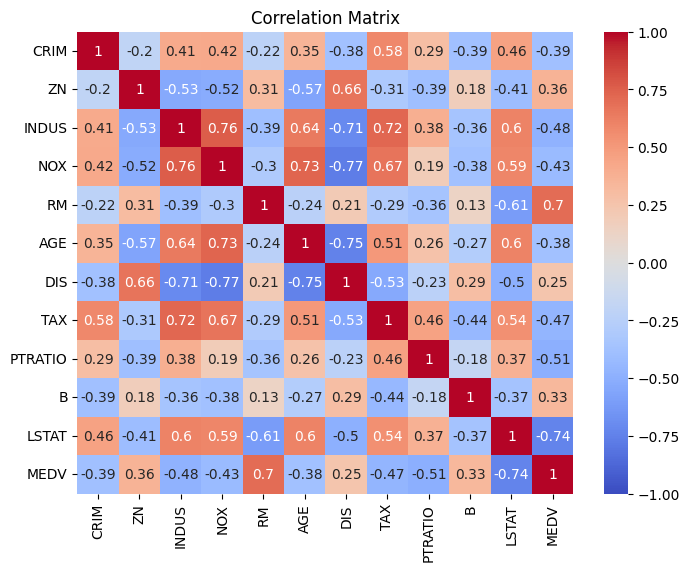

In [13]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

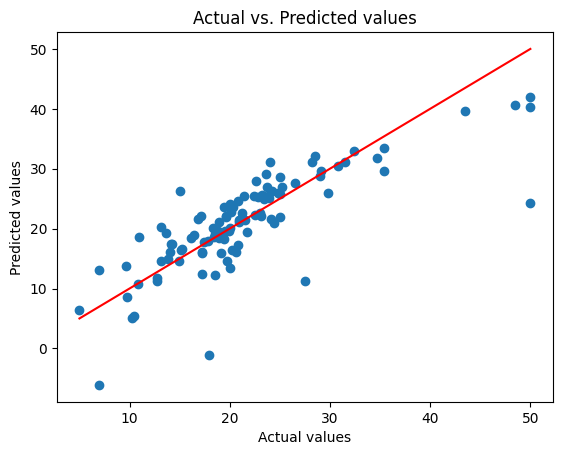

In [14]:
# Plot the regression line and data for the best model
X = df.drop('MEDV', axis=1)
y = df['MEDV']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plot the regression line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()

OLS

In [15]:
# Define the independent variables (X) and the dependent variable (y)
X = df.drop('MEDV', axis=1)  # Independent variables
y = df['MEDV']  # Dependent variable

# Add a constant to the independent variables (for intercept term)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     116.9
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          8.71e-130
Time:                        22:20:42   Log-Likelihood:                -1515.9
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     494   BIC:                             3107.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6950      5.051      5.879      0.0

In [17]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out=0.05,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break

    return included

# Perform stepwise selection
resulting_features = stepwise_selection(X, y)
print('Selected features:', resulting_features)

# Fit the model with selected features
X_selected = X[resulting_features]
model_selected = sm.OLS(y, sm.add_constant(X_selected)).fit()
print(model_selected.summary())

Add  LSTAT                          with p-value 5.0811e-88
Add  RM                             with p-value 3.47226e-27
Add  PTRATIO                        with p-value 1.64466e-14
Add  DIS                            with p-value 1.66847e-05
Add  NOX                            with p-value 5.48815e-08
Add  B                              with p-value 0.000380604
Add  ZN                             with p-value 0.00662932
Selected features: ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'B', 'ZN']
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     182.6
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          4.24e-133
Time:                        22:22:07   Log-Likelihood:                -1518.6
No. Observations:             

PCA

In [90]:
X = df

In [91]:
# Standardize the features
X_standardized = (X - X.mean()) / X.std()

# Initialize PCA with the number of components you want to retain
pca = PCA(n_components=2)

# Fit PCA to the standardized data
pca.fit(X_standardized)

# Transform the data onto the first two principal components
X_pca = pca.transform(X_standardized)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the DataFrame with the principal components and the target variable
print(df_pca.head())

Explained variance ratio: [0.499      0.12644881]
        PC1       PC2
0 -1.865954  0.676183
1 -1.136710 -0.056963
2 -2.217780  1.140802
3 -2.740106  0.350843
4 -2.672785  0.610974


In [92]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print cumulative explained variance
print("Cumulative explained variance with", 2, "components:", cumulative_explained_variance[-1])

Cumulative explained variance with 2 components: 0.6254488027899254


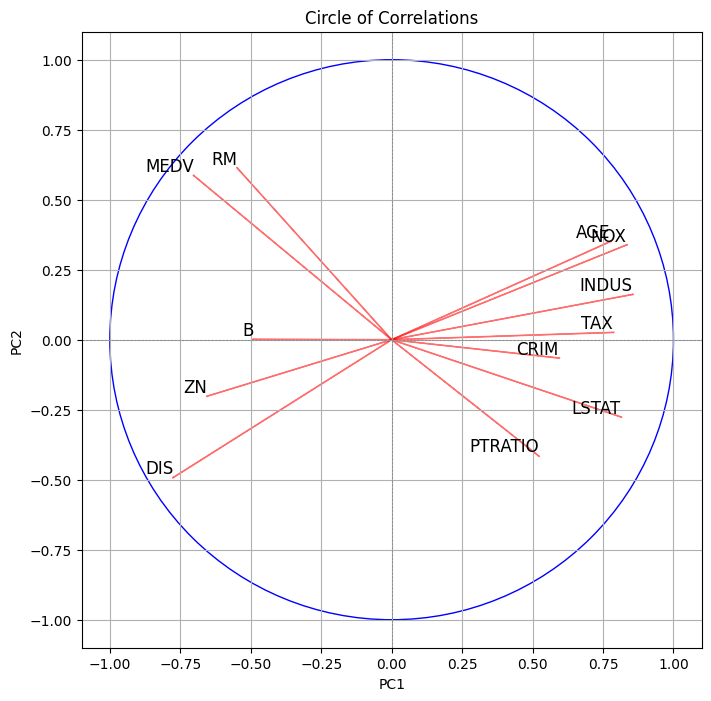

In [93]:

# Get the loadings (eigenvectors) from the PCA object
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot the circle of correlations
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
for i, (x, y) in enumerate(loadings):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x, y, df.columns[i], fontsize=12, ha='right', va='bottom')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Circle of Correlations')
plt.grid(True)
plt.show()

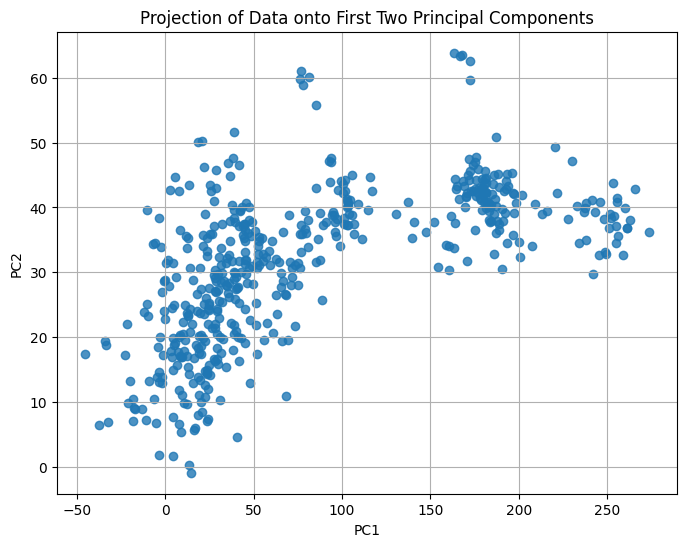

In [94]:

# Project the data onto the first two principal components
projected_data = pca.transform(df)

# Plot the projection
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data onto First Two Principal Components')
plt.grid(True)
plt.show()

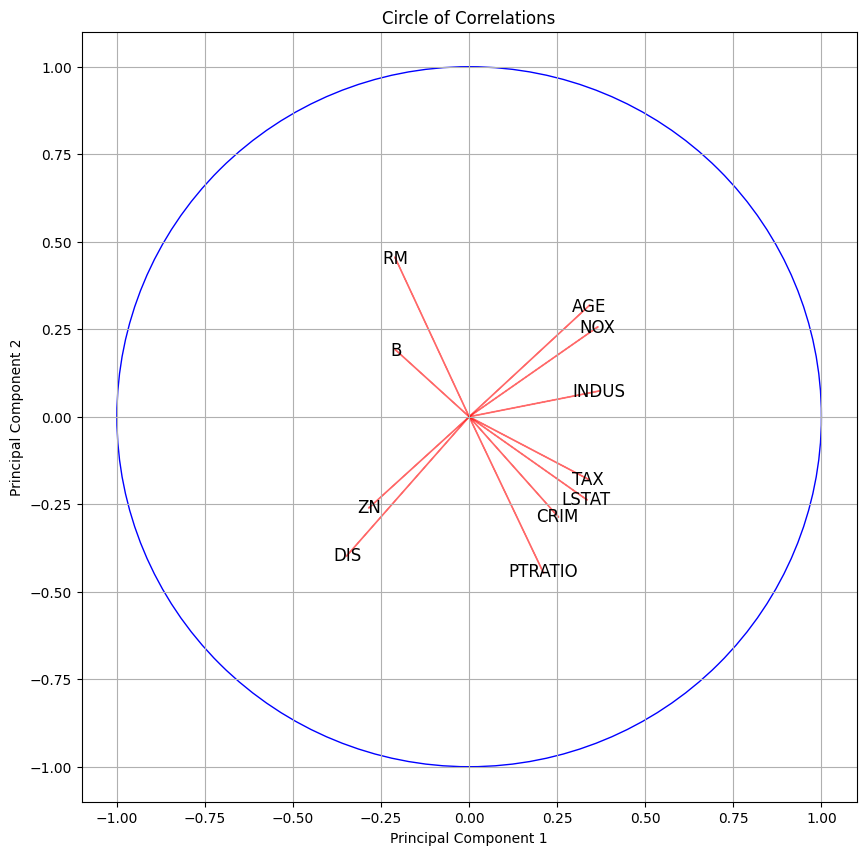

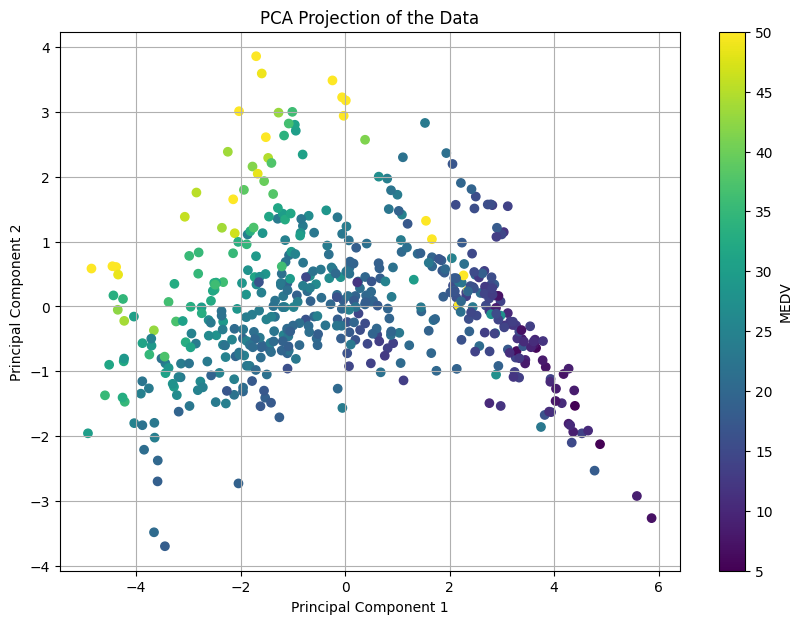

Explained variance by each component:
[0.50432371 0.11041929]
PCA components (loading scores):
[[ 0.25164954 -0.28251703  0.36809589  0.36294384 -0.20957853  0.33949164
  -0.34615633  0.33654102  0.20960549 -0.20756585  0.3321957 ]
 [-0.28457094 -0.25849939  0.07332742  0.25510055  0.45309981  0.3164676
  -0.39577631 -0.17782775 -0.44317192  0.18968017 -0.2359058 ]]


In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already in a DataFrame called 'df')
# df = pd.read_csv('path_to_boston_housing_dataset.csv')

# Select only the quantitative variables for PCA
quantitative_vars = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = df[quantitative_vars]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of principal components
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variable for visualization purposes
pca_df['MEDV'] = df['MEDV']

# Plot the circle of correlations
def plot_circle_of_correlations(pca, features):
    pcs = pca.components_
    fig, ax = plt.subplots(figsize=(10, 10))
    for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
        plt.arrow(0, 0, x, y, color='r', alpha=0.5)
        plt.text(x, y, features[i], ha='center', va='center', fontsize=12)
    circle = plt.Circle((0, 0), 1, color='b', fill=False)
    ax.add_artist(circle)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Circle of Correlations')
    plt.grid()
    plt.show()

# Plot the data projection onto the first two principal components
def plot_pca_projection(pca_df):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['MEDV'], cmap='viridis')
    plt.colorbar(scatter, label='MEDV')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Projection of the Data')
    plt.grid()
    plt.show()

# Plot the circle of correlations
plot_circle_of_correlations(pca, quantitative_vars)

# Plot the PCA projection
plot_pca_projection(pca_df)

# Print explained variance
print('Explained variance by each component:')
print(pca.explained_variance_ratio_)

# Print the components (loading scores)
print('PCA components (loading scores):')
print(pca.components_)
